In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from bioinfokit.analys import get_data
from statsmodels.stats.outliers_influence import variance_inflation_factor 


# load data
df = get_data('plant_richness').data
df.head(2)

,ntv_rich,area,latitude,dist_mainland
0,1.897627,1.602060,42.99,10.0
1,1.633468,0.477121,41.25,0.3


In [2]:
X = df[['area', 'latitude', 'dist_mainland']]   # independent variables
y = df['ntv_rich']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ntv_rich   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     64.98
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           7.47e-10
Time:                        22:46:37   Log-Likelihood:                 11.874
No. Observations:                  22   AIC:                            -15.75
Df Residuals:                      18   BIC:                            -11.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1045      0.981      5.201      0.000       3.043       7.166
area              0.3497      0.027     12.828      0.000       0.292       0.407
latitude         -0.0863      0.023     -3.777      0.001      -0.134      -0.038
dist_mainland    -0.0047      0.003     -1.732      0.100      -0.010       0.001
==============================================================================
Omnibus:                        2.723   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.253
Skew:                           0.130   Prob(JB):                        0.534
Kurtosis:                       1.860   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# get Root Mean Square Error (RMSE)
rmse(y, reg.predict(X))

0.14104492528008516

In [4]:
# Mean squared error (MSE)
np.mean(reg.resid**2)

0.01989367094726481

In [5]:
# Mean absolute error (MAE)
np.mean(np.abs(y-reg.predict(X)))

0.12269744365850276

In [6]:
# Variance Inflation Factor (VIF) 
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})


,variables,VIF
0,area,1.035192
1,latitude,1.023562
2,dist_mainland,1.026738


In [7]:
# Check Multiple Linear Regression (MLR) Assumptions
# get residuals and standardized residuals
from bioinfokit.visuz import stat
df[['yhat']]=pd.DataFrame(reg.predict(X)) 
df['res']=pd.DataFrame(reg.resid)
df['std_res']=reg.get_influence().resid_studentized_internal
df.head(2)

,ntv_rich,area,latitude,dist_mainland,yhat,res,std_res
0,1.897627,1.602060,42.99,10.0,1.906057,-0.00843,-0.056140
1,1.633468,0.477121,41.25,0.3,1.708459,-0.07499,-0.555013


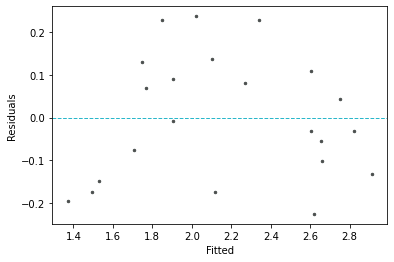

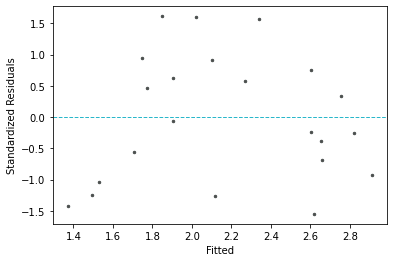

In [8]:
# create fitted (y_hat) vs residuals plot
stat.reg_resid_plot(df=df, yhat='yhat', resid='res', stdresid='std_res', show=True)

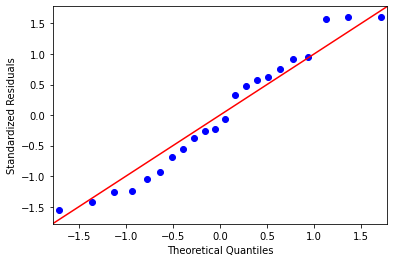

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# line=45 option to plot the data around 45 degree line
sm.qqplot(df['std_res'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()